#  Лабораторная работа №2 .Отчёт о проделанных экспериментах.

Для решения задачи машинного перевода с русского языка на английский была использована Encoder-Decoder модель.

В ходе работы было проведено четыре эксперимента, в ходе которых были получены модели значение метрики качества которых (BLEU) было удовлетворительным (BLEU * 100 > 18). 

## Эксперимент №1.

В первом эксперименте в качестве RNN для энкодера и декодера была взята модель GRU и добавлен механизм Attention.
Эмбеддинги для декодера и энкодера сгенерированы случайно и являются обучаемыми параметрами.
В качестве токенайзера взяты токенайзеры из библиотеки spacy.

Optimizator: Adam.

Criterion: CrossEntropyLoss.

Основные параметры:
```
dataset:
  train_size: 0.8
  val_size: 0.15
  test_size: 0.05
model:
  enc_emb_dim: 128
  dec_emb_dim: 128
  enc_hid_dim: 256
  dec_hid_dim: 256
  attn_dim: 128
  enc_dropout: 0.5
  dec_dropout: 0.5
train:
  batch_size: 16
  n_epoch: 40
  device: cuda
  learning_rate: 0.0008
preprocessing:
  spacy_tokenizer:
    ru: ru_core_news_lg
    en: en_core_web_lg
```

Всего обучаемых параметров модели: 10,954,079.

Ниже представлены графики отражающие значения функции потерь для train, validation.

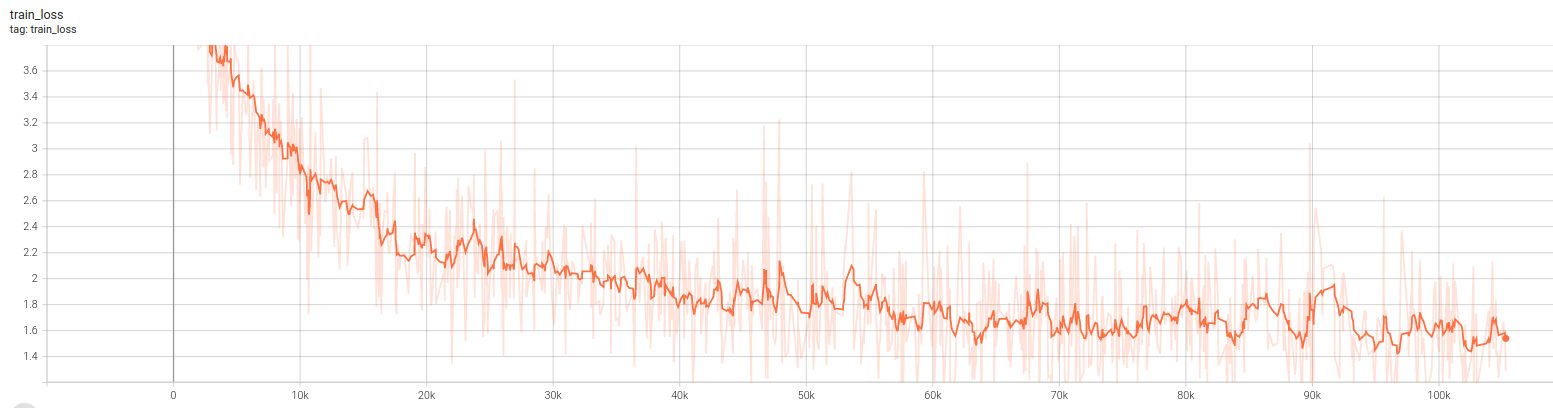

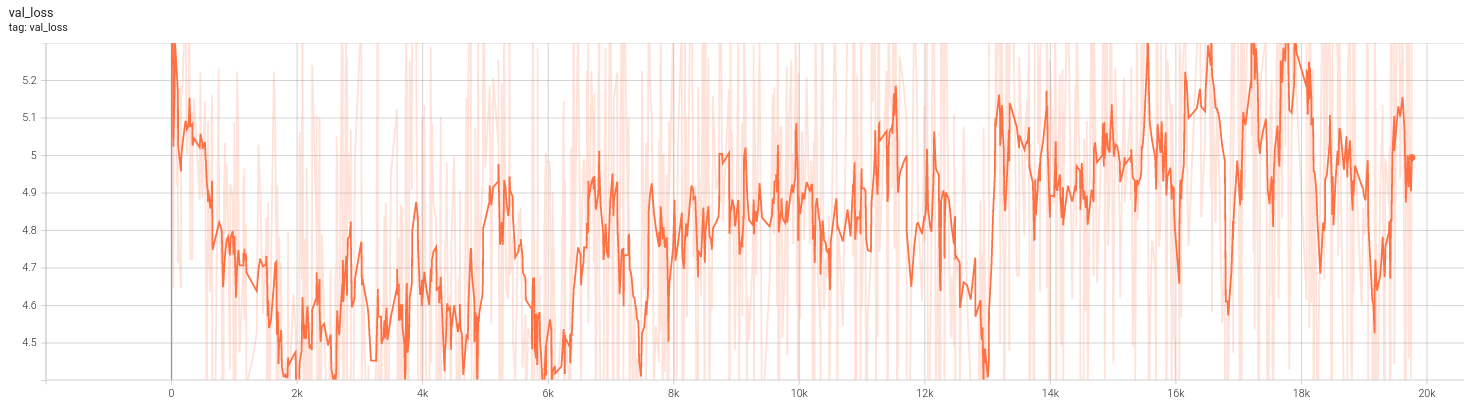

Значение BLEU: 22.662638955280002

#### Показатели обучения
```
Время обучения: 9236 секунд.
Количество батчей на обучении: 125060 = 105300 (train) + 19760 (validation)
Количество эпох: 40
Размер батча: 16
Средняя скорость обучения: 8665,916 примеров в секунду.
```

#### Показатели inference

Примеры хороших переводов:


```
origin: в ресторане отеля подают завтрак , обед и ужин , а в сувенирном магазине можно приобрести продукты , подарки и изделия .

translated: breakfast , lunch and dinner are served at the in - house restaurant . basic groceries , gifts and can be bought at the souvenir shop .

generated: breakfast is lunch , lunch and dinner are served at the property , and groceries , gifts and and souvenir shop . bought on site . souvenir shop
```


```
origin: в некоторых вариантах размещения есть терраса и / или балкон . в числе стандартных удобств телевизор с плоским экраном , обеденная зона и кухня с духовкой .

translated: the accommodation comes with a flat - screen tv . some units have a terrace and/or balcony . there is also a dining area and a kitchen fitted with an oven .

generated: some units have a terrace and/or balcony . there is a flat - screen tv and a dining area . there is also a kitchen . units . units . units . units

```

Примеры плохих переводов:

```
origin: кроме того , предоставляются полотенца и постельное белье .

translated: towels and bed linen are featured .

generated: . . . . . . . . . . . . . . . . . . . . . . . . . . .
```


```
origin: до морского парка можно доехать на автомобиле примерно за 10 минут .

translated: sea park is just over a 10 - minute car journey away .

generated: the and and and and and . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
```

## Эксперимент №2.

Так как в первом эксперименте модель переобучилась во втором эксперименте было уменьшен learning_rate.
При этом в качестве эмбеддингов были взяты предобученные веса fasttext для энкодера и декодера. При этом размер эмбеддингов был увеличен до 300.

Доля слов, для которых нашлись слова в fasttext для обоих языков составляет примерно 75%.

Всего обучаемых параметров модели: 13,987,966.

#### Показатели обучения
```
Время обучения: 9360 секунд.
Количество батчей на обучении: 125060 = 105300 (train) + 19760 (validation)
Количество эпох: 40
Размер батча: 16
Средняя скорость обучения: 8551,111 примеров в секунду.
```

Значение BLEU: 22.445998609025253

Ниже представлены графики отражающие значения функции потерь для train, validation.

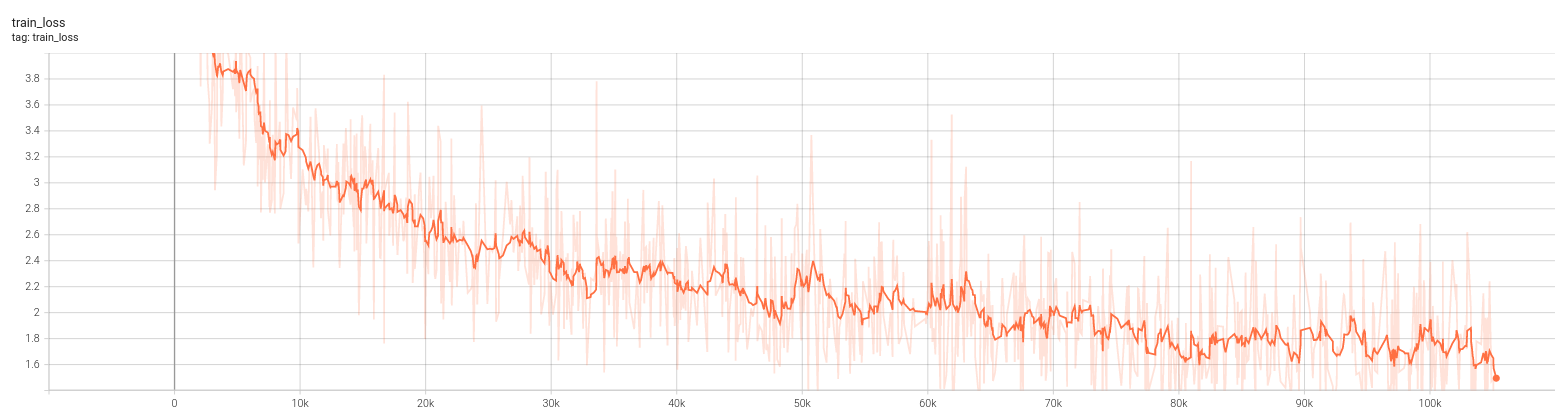

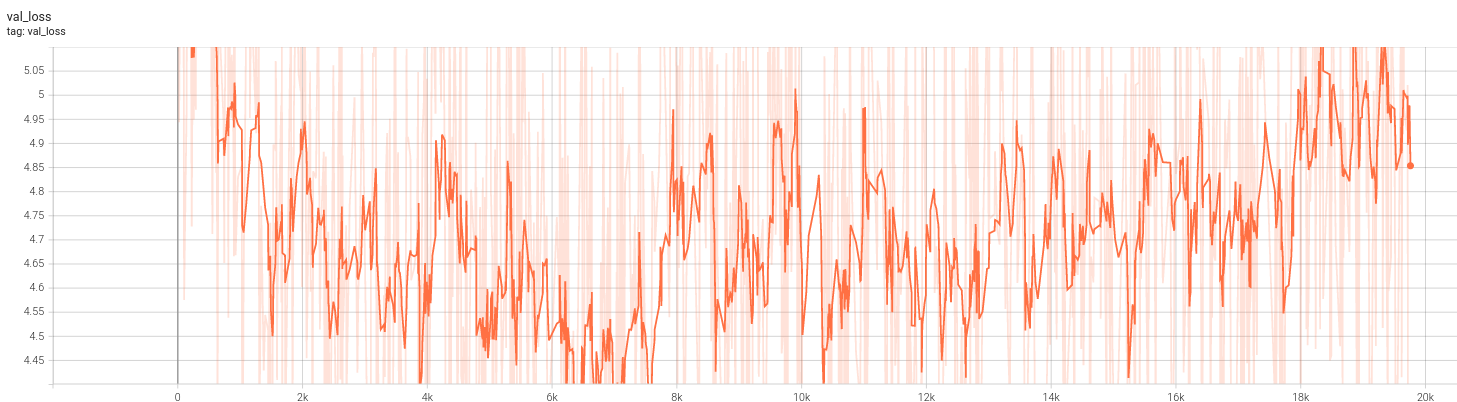

Переобучение немного замедлилось. При этом результат не улучшился.

#### Примеры хороших переводов:
```
origin: на полностью оборудованной кухне имеется посудомоечная машина и микроволновая печь .

translated: there is a fully equipped kitchen with a dishwasher and a microwave .

generated: there is a fully equipped kitchen with a dishwasher and a microwave . .
```

Здесь перевод даже лучше предоставленного (так как oven - духовая печь, а не плита):

```
origin: кроме того , в вашем распоряжении обеденный стол и мини - кухня с плитой и микроволновой печью .

translated: there is also a dining table and a kitchenette with an oven and microwave .

generated: there is also a dining table and a kitchenette with a stove and microwave . . . .
```

#### Примеры плохих переводов:
```
origin: комплекс black rock traditional rooms расположен в традиционном поселке .

translated: black rock traditional rooms offers accommodation in the traditional settlement of emporio .

generated: the rural rural <unk> are located in the traditional stone - style .</unk>
```

```
origin: отель удобно расположен для стадиона paris ( ) , замка и зоопарка , и парижского диснейленда .

translated: the hotel is conveniently situated to reach paris stadium ( ) , vincennes castle and zoo , horse tracks and disneyland resort paris .

generated: the hotel is <unk> is <unk> ( <unk> ) , <unk> <unk> <unk> <unk> , <unk> <unk> <unk> , and <unk> <unk> <unk> .</unk></unk></unk></unk></unk></unk></unk></unk></unk></unk></unk></unk></unk>
```